## Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

## Generating Data

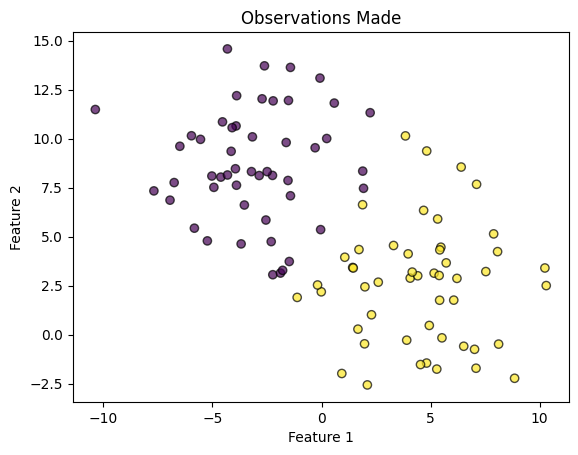

In [2]:
# Generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=42)

# Plot data
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k',alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observations Made')
plt.show()

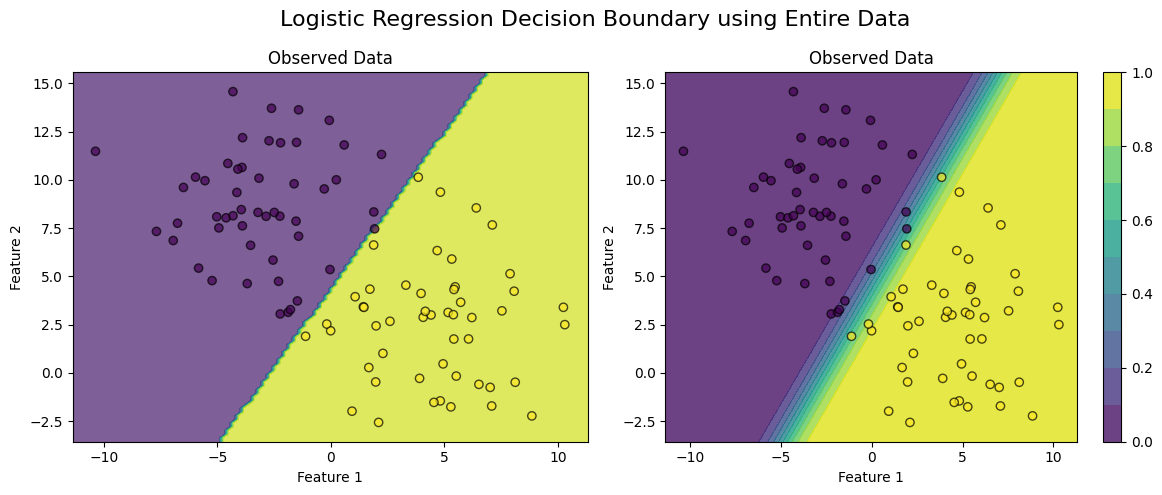

In [3]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# PLotting the decsion boundary of the model
x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_pred = logreg.predict(X_grid).reshape(xx1.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx1, xx2, y_pred, cmap='viridis', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k',alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed Data')


plt.subplot(1, 2, 2)
y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)
plt.contourf(xx1, xx2, y_prob, cmap='viridis', alpha=0.8, vmin=0, vmax=1, levels=10)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k',alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed Data')

plt.suptitle('Logistic Regression Decision Boundary using Entire Data', fontsize=16)
plt.tight_layout()
plt.show()

### Accuracy

In [4]:
print("Accuracy using the whole dataset : ",accuracy_score(y, logreg.predict(X)))

Accuracy using the whole dataset :  0.99


# Active Learning


## Splitting into pool and train set

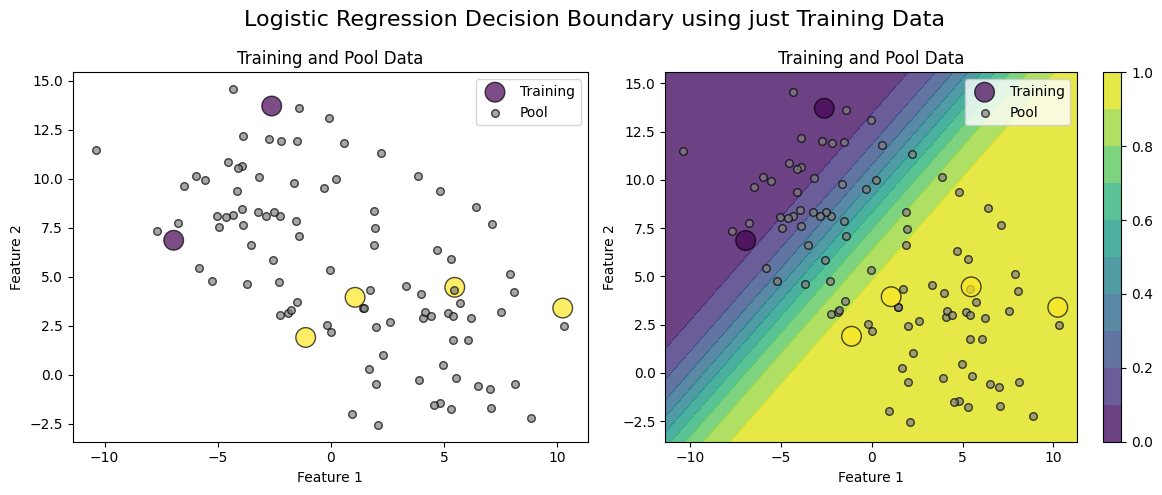

In [15]:
# creating two set of points Training and pool
X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420)

# plotting the training and pool data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,label='Training',s=200,edgecolors='k',alpha=0.7)
plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c='gray', edgecolor='k',alpha=0.7,s=30,label='Pool')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')

plt.legend()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, y_prob, cmap='viridis', alpha=0.8, levels=10)
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,label='Training', edgecolor='k',s=200,alpha=0.7,zorder=2)
plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c='gray',alpha=0.7,s=30,label='Pool', edgecolor='k',zorder=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')
plt.suptitle('Logistic Regression Decision Boundary using just Training Data', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


### Accuracy

In [12]:
print("Accuracy using the training dataset : ",accuracy_score(y, logreg.predict(X)))

Accuracy using the training dataset :  0.88


## Active Learning loop with Logistic Regression

In [17]:
# Running active learning loop
X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420)
X_init = X_train
y_init = y_train
query_x = []
query_y = []

for iter in range(11):

    # Train using the training data
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # figure out most uncertain point
    y_prob = logreg.predict_proba(X_pool)[:, 1]
    uncertainty = np.abs(y_prob - 0.5)
    query_idx = np.argmin(uncertainty)
    query_x.append(X_pool[query_idx])
    query_y.append(y_pool[query_idx])

    # updating the training and pool data
    X_train = np.vstack((X_train, X_pool[query_idx]))
    y_train = np.append(y_train, y_pool[query_idx])
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)

    acc = accuracy_score(y, logreg.predict(X))
    print("Accuracy at iteration {} : {}".format(iter,acc))


Accuracy at iteration 0 : 0.88
Accuracy at iteration 1 : 0.9
Accuracy at iteration 2 : 0.91
Accuracy at iteration 3 : 0.93
Accuracy at iteration 4 : 0.93
Accuracy at iteration 5 : 0.99
Accuracy at iteration 6 : 0.98
Accuracy at iteration 7 : 0.99
Accuracy at iteration 8 : 0.99
Accuracy at iteration 9 : 0.99
Accuracy at iteration 10 : 0.99


### Plotting the decision boundary

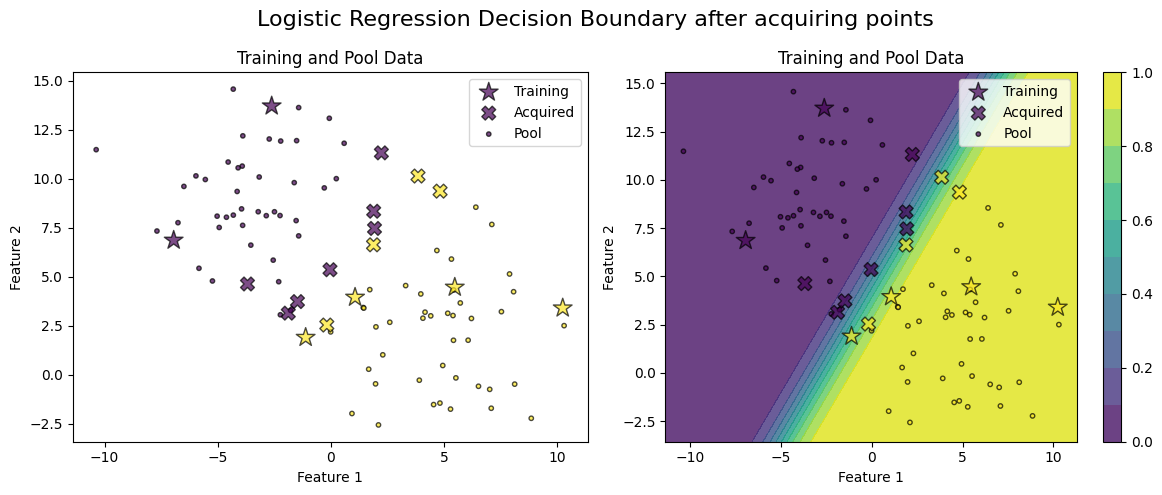

In [18]:
query_x = np.array(query_x)
query_y = np.array(query_y)

# Plotting the decision boundary
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_init[:, 0], X_init[:, 1], marker='*', c=y_init,label='Training',s=200,edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(query_x[:, 0], query_x[:, 1], marker='X', c=query_y,label='Acquired',s=100,edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c=y_pool, edgecolor='k',alpha=0.7,s=10,label='Pool')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')
plt.legend()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, y_prob, cmap='viridis', alpha=0.8, levels=10)
plt.colorbar()
plt.scatter(X_init[:, 0], X_init[:, 1], marker='*', c=y_init,label='Training',s=200,edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(query_x[:, 0], query_x[:, 1], marker='X', c=query_y,label='Acquired',s=100,edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c=y_pool,alpha=0.7,s=10,label='Pool', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')
plt.suptitle('Logistic Regression Decision Boundary after acquiring points', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

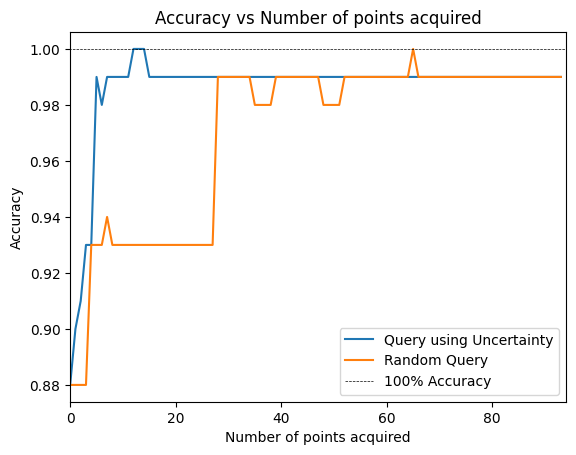

In [19]:
# running active learning loop simultaneously with random acquisition
X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420)

X_train_active,y_train_active=X_train,y_train
X_train_random,y_train_random=X_train,y_train

X_pool_active,y_pool_active=X_pool,y_pool
X_pool_random,y_pool_random=X_pool,y_pool

acc_active=[]
acc_random=[]

for iter in range(len(X_pool)):
    # Train using the Active training data
    logreg = LogisticRegression()
    logreg.fit(X_train_active, y_train_active)

    # figure out most uncertain point
    y_prob = logreg.predict_proba(X_pool_active)[:, 1]
    uncertainty = np.abs(y_prob - 0.5)
    query_idx = np.argmin(uncertainty)

    # updating the training and pool data
    X_train_active = np.vstack((X_train_active, X_pool_active[query_idx]))
    y_train_active = np.append(y_train_active, y_pool_active[query_idx])
    X_pool_active = np.delete(X_pool_active, query_idx, axis=0)
    y_pool_active = np.delete(y_pool_active, query_idx)

    acc_active.append(accuracy_score(y, logreg.predict(X)))

    # Train using the Random training data
    logreg = LogisticRegression()
    logreg.fit(X_train_random, y_train_random)

    # figure out most uncertain point
    query_idx = np.random.randint(0,len(X_pool_random))

    # updating the training and pool data
    X_train_random = np.vstack((X_train_random, X_pool_random[query_idx]))
    y_train_random = np.append(y_train_random, y_pool_random[query_idx])
    X_pool_random = np.delete(X_pool_random, query_idx, axis=0)
    y_pool_random = np.delete(y_pool_random, query_idx)

    acc_random.append(accuracy_score(y, logreg.predict(X)))

plt.plot(acc_active,label='Query using Uncertainty')
plt.plot(acc_random,label='Random Query')
plt.xlabel('Number of points acquired')
plt.hlines(1.0,-1,len(X_pool)+1,linestyles='dashed',label='100% Accuracy',colors='k',linewidth=0.5)
plt.xlim(0,len(X_pool))
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of points acquired')
plt.legend()
plt.show()